# Music Machine

### Pulling the data

In [385]:
import spotipy.util as util
import spotipy
import os.path as path
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

username = 'ninahew'
client_id ='a758a8092e3b45949388c4123f79948f'
client_secret = '9852f1ad63d64a4284bf4496e1bd2115'
redirect_uri = 'http://localhost:7777/callback'
scope = 'user-read-recently-played'
user_id = 'spotify:user:ninahew'

from spotipy.oauth2 import SpotifyClientCredentials

spotify = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(client_id=client_id, 
                                                                              client_secret=client_secret))

In [386]:
# psb_uri = 'spotify:artist:2ycnb8Er79LoH2AsR5ldjh'

In [387]:
# psb_search = spotify.search(q='pet shop boys', type='artist')
# psb_id = psb_search['artists']['items'][0]['id']
# psb_id

In [388]:
# df = pd.DataFrame()
# filepath = "../data/PSB data.csv"
# if not path.exists(filepath):
#     artist = psb_id
#     albums = spotify.artist_albums(artist)
#     for album in albums['items']:
#         tracks = spotify.album_tracks(album['id'])
#         for track in tracks['items']:
#                 full_track = spotify.track(track['id'])
#                 audio_features = spotify.audio_features(track['id'])[0]
#                 audio_features['track_name'] = track['name']
#                 audio_features['album_name'] = album['name']
#                 audio_features['album_type'] = album['album_type']
#                 audio_features['artist'] = ', '.join(sorted([artist['name'] for artist in track['artists']]))
#                 audio_features['release_date'] = album['release_date']
#                 audio_features['popularity'] = full_track['popularity']
#                 df = df.append(audio_features, ignore_index=True)
#         df.to_csv(path_or_buf = filepath)
# else:
#     df = pd.read_csv(filepath)
    
# df.sample(3)

In [389]:
best_songs_uri = 'spotify:playlist:0gqrnk12Q8OExuCeKyBRCq'
best_songs = spotify.search(q = 'BEST SONGS OF ALL TIME', limit=50, offset=0, type='playlist', market=None)
best_songs_id = best_songs['playlists']['items'][0]['id']
best_songs_id

'0gqrnk12Q8OExuCeKyBRCq'

In [390]:
best_songs_df = pd.DataFrame()

i = 0
tracks = spotify.playlist_tracks(best_songs_id, offset = i, limit=100)['items']
best_songs_list = []
best_songs_list = tracks

while len(tracks) == 100:
    i = i + 100
    tracks = spotify.playlist_tracks(best_songs_id, offset = i, limit=100)['items']
    best_songs_list = best_songs_list + tracks

best_songs_list


[{'added_at': '2017-04-19T18:35:25Z',
  'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/21uq7un2k737kvriupw54hjna'},
   'href': 'https://api.spotify.com/v1/users/21uq7un2k737kvriupw54hjna',
   'id': '21uq7un2k737kvriupw54hjna',
   'type': 'user',
   'uri': 'spotify:user:21uq7un2k737kvriupw54hjna'},
  'is_local': False,
  'primary_color': None,
  'track': {'album': {'album_type': 'compilation',
    'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/4QQgXkCYTt3BlENzhyNETg'},
      'href': 'https://api.spotify.com/v1/artists/4QQgXkCYTt3BlENzhyNETg',
      'id': '4QQgXkCYTt3BlENzhyNETg',
      'name': 'Earth, Wind & Fire',
      'type': 'artist',
      'uri': 'spotify:artist:4QQgXkCYTt3BlENzhyNETg'}],
    'available_markets': [],
    'external_urls': {'spotify': 'https://open.spotify.com/album/6UixeNUSjrBnxeYV0ZuGHR'},
    'href': 'https://api.spotify.com/v1/albums/6UixeNUSjrBnxeYV0ZuGHR',
    'id': '6UixeNUSjrBnxeYV0ZuGHR',
    'images': [{

In [391]:
track_ids = [track['track']['id'] for track in best_songs_list]

for track_id in track_ids:
    full_track = spotify.track(track_id)
    audio_features = spotify.audio_features(track_id)[0]
   # audio_features['track_name'] = track['name']
#     audio_features['album_name'] = album['name']
#     audio_features['album_type'] = album['album_type']
#     audio_features['artist'] = ', '.join(sorted([artist['name'] for artist in track['artists']]))
#     audio_features['release_date'] = album['release_date']
    audio_features['popularity'] = full_track['popularity']
    best_songs_df = df.append(audio_features, ignore_index=True)

In [392]:
len(df)

308

In [393]:
best_songs_df

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,analysis_url,id,time_signature,track_href,type,uri
0,0.000029,0.488,268787.0,0.957,0.009040,0.0,0.5540,-6.115,1.0,12.0,0.0592,124.997,0.531,NaN,NaN,NaN,NaN,NaN,NaN
1,0.219000,0.577,215333.0,0.633,0.003960,0.0,0.1160,-7.920,1.0,11.0,0.0361,130.081,0.204,NaN,NaN,NaN,NaN,NaN,NaN
2,0.001990,0.575,231347.0,0.894,0.210000,8.0,0.4630,-6.073,1.0,11.0,0.0391,127.010,0.320,NaN,NaN,NaN,NaN,NaN,NaN
3,0.022400,0.643,206160.0,0.736,0.000059,9.0,0.3400,-6.159,0.0,14.0,0.0428,124.993,0.696,NaN,NaN,NaN,NaN,NaN,NaN
4,0.189000,0.510,300520.0,0.602,0.685000,4.0,0.1180,-9.508,0.0,7.0,0.0313,130.021,0.310,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,0.008410,0.411,205040.0,0.863,0.004000,10.0,0.1420,-6.140,1.0,11.0,0.0566,149.992,0.383,NaN,NaN,NaN,NaN,NaN,NaN
305,0.271000,0.728,107520.0,0.385,0.000000,0.0,0.0907,-7.708,1.0,8.0,0.0376,120.052,0.344,NaN,NaN,NaN,NaN,NaN,NaN
306,0.283000,0.920,128800.0,0.316,0.002830,10.0,0.1110,-10.668,1.0,9.0,0.0674,127.043,0.206,NaN,NaN,NaN,NaN,NaN,NaN
307,0.006810,0.436,207080.0,0.510,0.062400,0.0,0.0918,-7.052,1.0,10.0,0.0289,127.025,0.138,NaN,NaN,NaN,NaN,NaN,NaN


In [394]:
best_songs_df.columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'popularity',
       'speechiness', 'tempo', 'valence', 'analysis_url', 'id',
       'time_signature', 'track_href', 'type', 'uri'],
      dtype='object')

In [395]:
best_songs_df.drop(columns= ['analysis_url', 'track_href', 'type', 'uri'], inplace = True)
best_songs_df.drop(columns='id', inplace = True)
best_songs_df.drop(columns = ['time_signature'], inplace = True)
# best_songs_df.drop(columns = 'Unnamed: 0', inplace = True)

In [396]:
best_songs_df.columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'popularity',
       'speechiness', 'tempo', 'valence'],
      dtype='object')

### Normalizing the data

In [397]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler = MinMaxScaler()
# scaler = StandardScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
df_normalized.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence
0,0.000026,0.404959,0.288371,0.954600,0.009407,0.000000,0.535104,0.815564,1.0,0.260870,0.249284,0.486150,0.560992
1,0.222332,0.527548,0.193958,0.567503,0.004121,0.000000,0.073371,0.685624,1.0,0.239130,0.083811,0.539454,0.187150
2,0.002017,0.524793,0.222243,0.879331,0.218522,0.727273,0.439174,0.818588,1.0,0.239130,0.105301,0.507255,0.319767
3,0.022738,0.618457,0.177757,0.690562,0.000062,0.818182,0.309509,0.812397,0.0,0.304348,0.131805,0.486108,0.749628
4,0.191875,0.435262,0.344419,0.530466,0.712799,0.363636,0.075480,0.571305,0.0,0.152174,0.049427,0.538825,0.308334


In [398]:
df_normalized.dtypes

acousticness        float64
danceability        float64
duration_ms         float64
energy              float64
instrumentalness    float64
key                 float64
liveness            float64
loudness            float64
mode                float64
popularity          float64
speechiness         float64
tempo               float64
valence             float64
dtype: object

<AxesSubplot:>

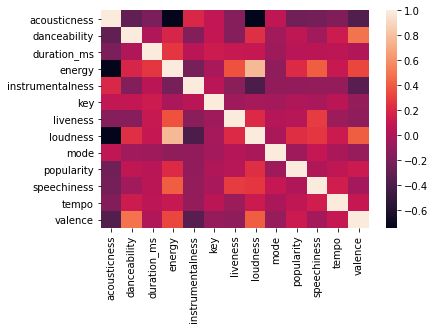

In [399]:
import seaborn as sns
sns.heatmap(df_normalized.corr())
# no individual factor jumps out to influence popularity

In [400]:
X = df_normalized[['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'valence']]
y = df_normalized['popularity']

### Lasso Regression

In [401]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)
lasso_model = Lasso(alpha= 1.0)
lasso_model.fit(X_train,y_train).coef_ 

array([-0.,  0.,  0.,  0., -0.,  0.,  0.,  0., -0., -0.,  0.,  0.])

In [402]:
y_pred = lasso_model.predict(X_train)
lasso_test = pd.DataFrame({'test':y_train, 'predicted':y_pred})
lasso_test

,test,predicted
110,0.847826,0.269767
52,0.043478,0.269767
26,0.065217,0.269767
237,0.152174,0.269767
248,0.043478,0.269767
...,...,...
66,0.043478,0.269767
53,0.043478,0.269767
79,0.021739,0.269767
280,0.347826,0.269767


<AxesSubplot:>

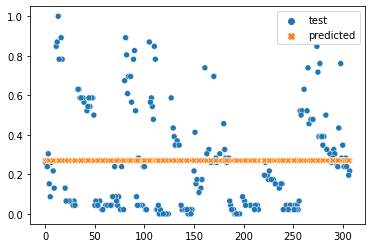

In [403]:
sns.scatterplot(data = lasso_test)

### Elastic Net

In [404]:
from sklearn.linear_model import ElasticNet

elastic_model = ElasticNet(alpha = 1.0)
elastic_model.fit(X_train,y_train).coef_

array([-0.,  0.,  0.,  0., -0.,  0.,  0.,  0., -0., -0.,  0.,  0.])

In [405]:
y_pred_elastic = elastic_model.predict(X_train)
elastic_test = pd.DataFrame({'test':y_train, 'predicted':y_pred_elastic})
elastic_test

,test,predicted
110,0.847826,0.269767
52,0.043478,0.269767
26,0.065217,0.269767
237,0.152174,0.269767
248,0.043478,0.269767
...,...,...
66,0.043478,0.269767
53,0.043478,0.269767
79,0.021739,0.269767
280,0.347826,0.269767


### Linear Regression

In [406]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_train,y_train).coef_ 

array([-0.35905748, -0.17900049, -0.06113975, -0.02453678, -0.04628433,
        0.10145119,  0.04892727,  0.06693452, -0.02135257, -0.10020251,
        0.08521439,  0.08046711])

In [407]:
y_pred_linear = linear_model.predict(X_train)
linear_test = pd.DataFrame({'test':y_train, 'predicted':y_pred_linear})
linear_test

,test,predicted
110,0.847826,0.366299
52,0.043478,0.252823
26,0.065217,0.256952
237,0.152174,0.006138
248,0.043478,0.353690
...,...,...
66,0.043478,0.310399
53,0.043478,0.275579
79,0.021739,0.358676
280,0.347826,0.369689


In [408]:
from sklearn.metrics import r2_score
print(r2_score(y_train, y_pred_linear))
print((1-(1-r2_score(y_train, y_pred_linear))*((len(X_train)-1)/(len(X_train)-len(X_train[0])-1))))

0.09953644919999993


KeyError: 0

In [378]:
y_pred_linear = linear_model.predict(X_test)
linear_test = pd.DataFrame({'test':y_test, 'predicted':y_pred_linear})
linear_test

,test,predicted
75,0.043478,0.293554
7,0.152174,0.294979
154,0.130435,0.181398
56,0.043478,0.269893
217,0.021739,0.272127
...,...,...
209,0.043478,0.143274
263,0.456522,0.296636
85,0.608696,0.321869
31,0.065217,0.269668


In [379]:
r2_score(y_test, y_pred_linear)

-0.07982927092445857

In [380]:
coefs = linear_model.fit(X_train,y_train).coef_
coefs_df = pd.DataFrame(coefs)
coefs_df

,0
0,-0.359057
1,-0.179000
2,-0.061140
3,-0.024537
4,-0.046284
5,0.101451
6,0.048927
7,0.066935
8,-0.021353
9,-0.100203


In [195]:
attributes = list(df_normalized.columns)
attributes.remove('popularity')
coefs_df['attributes'] = attributes
coefs_df.columns = ['coefs', 'attributes']
coefs_df

,coefs,attributes
0,-0.359057,acousticness
1,-0.179000,danceability
2,-0.061140,duration_ms
3,-0.024537,energy
4,-0.046284,instrumentalness
5,0.101451,key
6,0.048927,liveness
7,0.066935,loudness
8,-0.021353,mode
9,-0.100203,speechiness


<AxesSubplot:xlabel='Attributes', ylabel='Coefficient'>

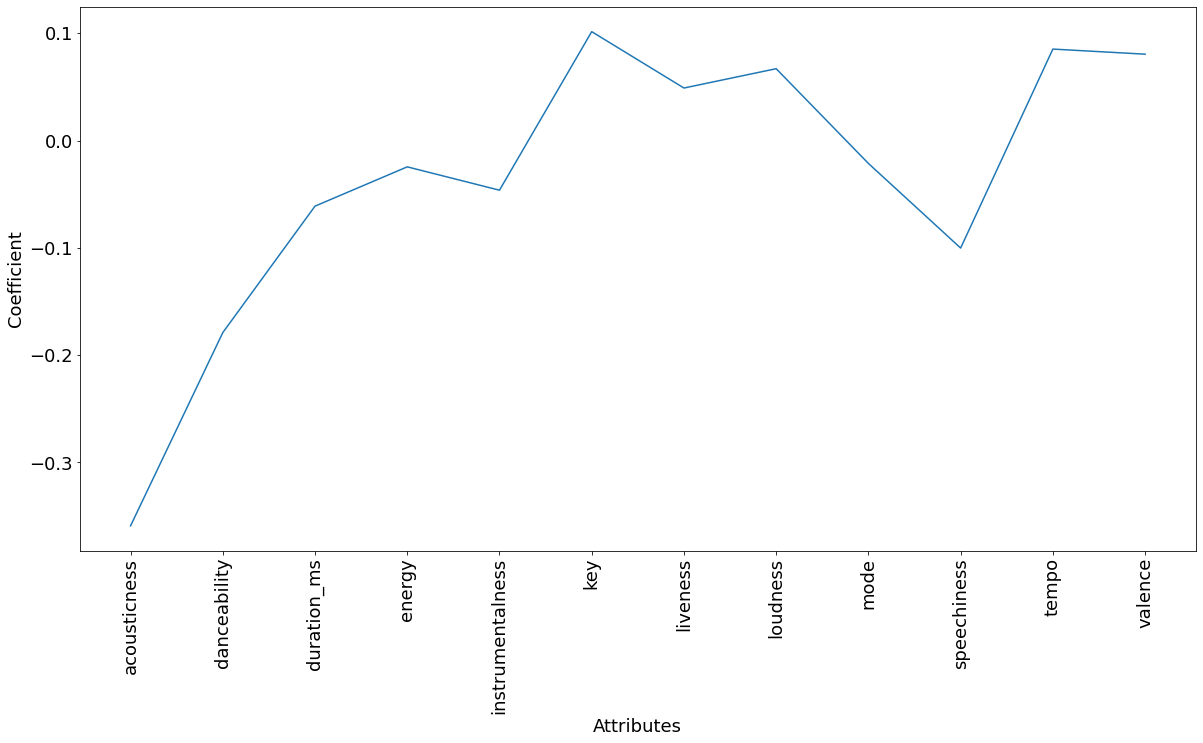

In [201]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.xlabel('Attributes', fontsize=18)
plt.ylabel('Coefficient', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.xticks(rotation='vertical')


sns.lineplot(data = coefs_df, x = 'attributes', y = 'coefs')

### Decision Tree

In [287]:
from sklearn import tree

In [346]:
tree_model = tree.DecisionTreeRegressor(splitter = 'random', max_depth = 500)
tree_model.fit(X_train,y_train)
y_pred_tree = tree_model.predict(X_train)
tree_train = pd.DataFrame({'train':y_train, 'predicted':y_pred_tree})
# tree.plot_tree(tree_model)
tree_train

,train,predicted
110,0.847826,0.847826
52,0.043478,0.336957
26,0.065217,0.065217
237,0.152174,0.152174
248,0.043478,0.391304
...,...,...
66,0.043478,0.315217
53,0.043478,0.315217
79,0.021739,0.271739
280,0.347826,0.347826


In [353]:
r2_score(y_train, y_pred_tree)

ValueError: Found input variables with inconsistent numbers of samples: [215, 93]

<AxesSubplot:xlabel='X Axis', ylabel='Y Axis'>

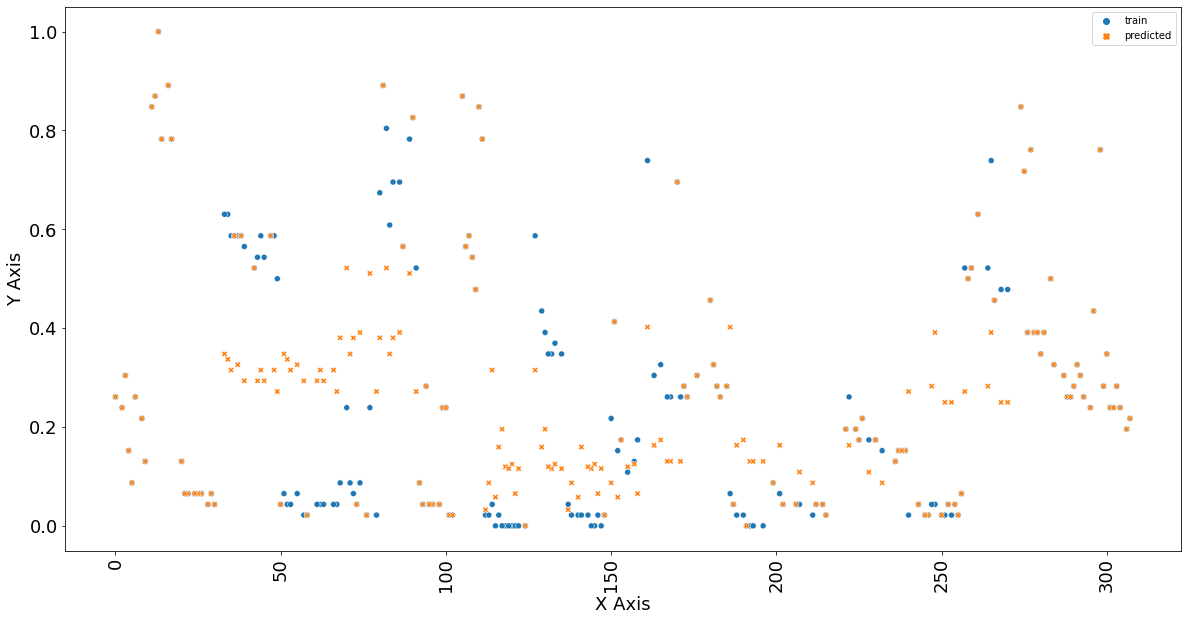

In [348]:
plt.figure(figsize=(20,10))
plt.xlabel('X Axis', fontsize=18)
plt.ylabel('Y Axis', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.xticks(rotation='vertical')



sns.scatterplot(data = tree_train)

In [349]:
y_pred_tree = tree_model.predict(X_test)

tree_test = pd.DataFrame({'train':y_test, 'predicted':y_pred_tree})
tree_test

,train,predicted
75,0.043478,0.565217
7,0.152174,0.021739
154,0.130435,0.195652
56,0.043478,0.586957
217,0.021739,0.152174
...,...,...
209,0.043478,0.173913
263,0.456522,0.021739
85,0.608696,0.043478
31,0.065217,0.043478


In [350]:
r2_score(y_test, y_pred_tree)

-1.891567047285636

<AxesSubplot:xlabel='X Axis', ylabel='Y Axis'>

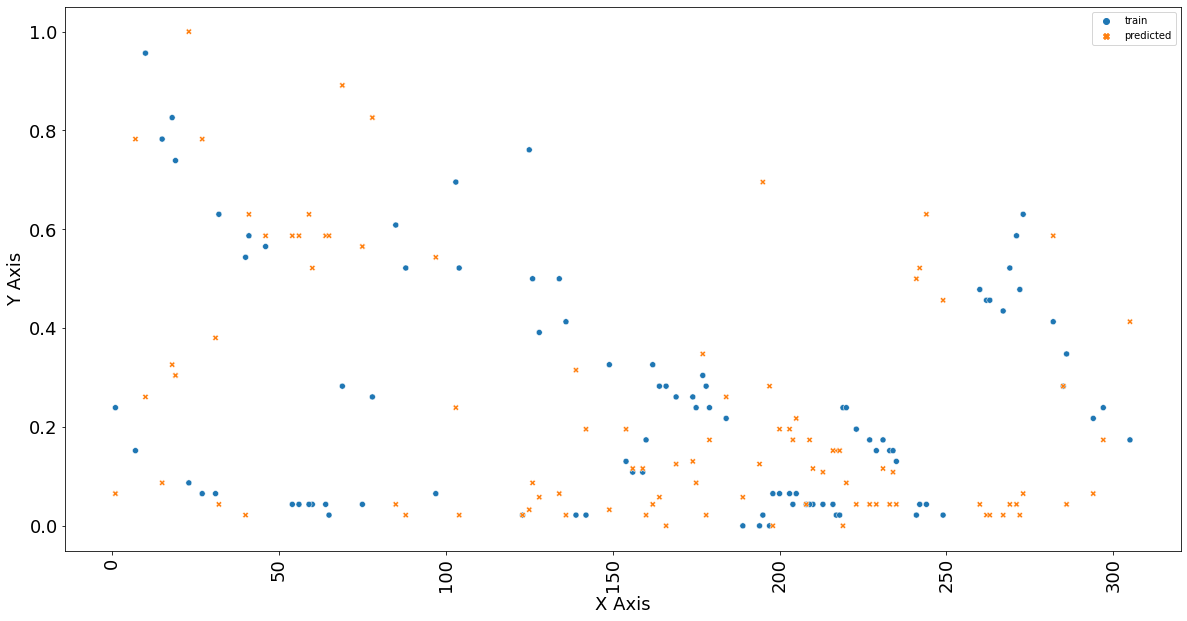

In [345]:
plt.figure(figsize=(20,10))
plt.xlabel('X Axis', fontsize=18)
plt.ylabel('Y Axis', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.xticks(rotation='vertical')



sns.scatterplot(data = tree_test)

### Random Forest

In [257]:
from sklearn.ensemble import RandomForestRegressor

forest_model = RandomForestRegressor(n_estimators = 300)
forest_model.fit(X_train,y_train)
y_pred_forest = forest_model.predict(X_train)
forest_train = pd.DataFrame({'train':y_train, 'predicted':y_pred_forest})
forest_train

,train,predicted
110,0.847826,0.678690
52,0.043478,0.315944
26,0.065217,0.185380
237,0.152174,0.139163
248,0.043478,0.387598
...,...,...
66,0.043478,0.311885
53,0.043478,0.300843
79,0.021739,0.287211
280,0.347826,0.401528


In [258]:
r2_score(y_train, y_pred_forest)
# mean_absolute_error(y_train, y_pred_forest)

0.6088896087875438

In [267]:
y_pred_forest = forest_model.predict(X_test)

forest_test = pd.DataFrame({'test':y_test, 'predicted':y_pred_forest})
forest_test

,test,predicted
75,0.043478,0.475682
7,0.152174,0.523304
154,0.130435,0.187446
56,0.043478,0.456330
217,0.021739,0.199558
...,...,...
209,0.043478,0.177699
263,0.456522,0.097446
85,0.608696,0.197385
31,0.065217,0.263308


In [268]:
r2_score(y_test, y_pred_forest)

-0.7783389455672538

In [269]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred_forest)

0.25365570139044885

<AxesSubplot:xlabel='X Axis', ylabel='Y Axis'>

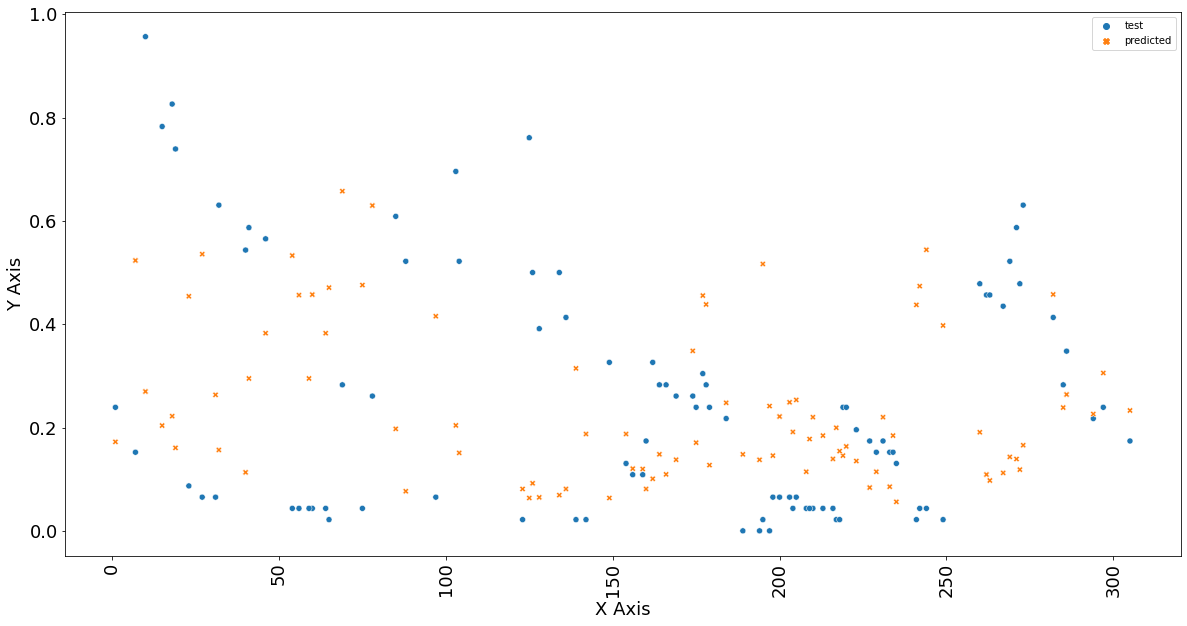

In [270]:
plt.figure(figsize=(20,10))
plt.xlabel('X Axis', fontsize=18)
plt.ylabel('Y Axis', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.xticks(rotation='vertical')



sns.scatterplot(data = forest_test)

### Ada Boost

In [281]:
# from sklearn.ensemble import AdaBoostRegressor

In [282]:
# ada_model = AdaBoostRegressor()
# ada_model.fit(X_train,y_train)
# y_pred_ada = ada_model.predict(X_train)
# ada_train = pd.DataFrame({'train':y_train, 'predicted':y_pred_ada})
# ada_train

In [283]:
# r2_score(y_train, y_pred_ada)

In [284]:
# y_pred_ada = ada_model.predict(X_test)

# ada_test = pd.DataFrame({'test':y_test, 'predicted':y_pred_ada})
# ada_test

In [286]:
# r2_score(y_test, y_pred_ada)

In [409]:
from sklearn.neural_network import MLPRegressor

In [410]:
mlp_model = MLPRegressor()
mlp_model.fit(X_train,y_train)
y_pred_mlp = mlp_model.predict(X_train)
mlp_train = pd.DataFrame({'train':y_train, 'predicted':y_pred_forest})
mlp_train

ValueError: array length 93 does not match index length 215